<a href="https://colab.research.google.com/github/EduardoLawson1/Pytorch_Workflow/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [ ]:
weight = 0.7
bias = 0.3

#criando dados
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)


###splitting data into training and testing

In [ ]:
#crando treino e teste
train_split = int(0.8 * len(X))
train_split

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  "plota treino, teste e compara predições"
  plt.figure(figsize=(10,7))

  "plota treino em azul"
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  "plota teste em verde"
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data" )

  #AE THERE PREDICTIONS?
  if predictions is not None:
    #plota se existirem
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #legenda
    plt.legend(prop={"size": 14});


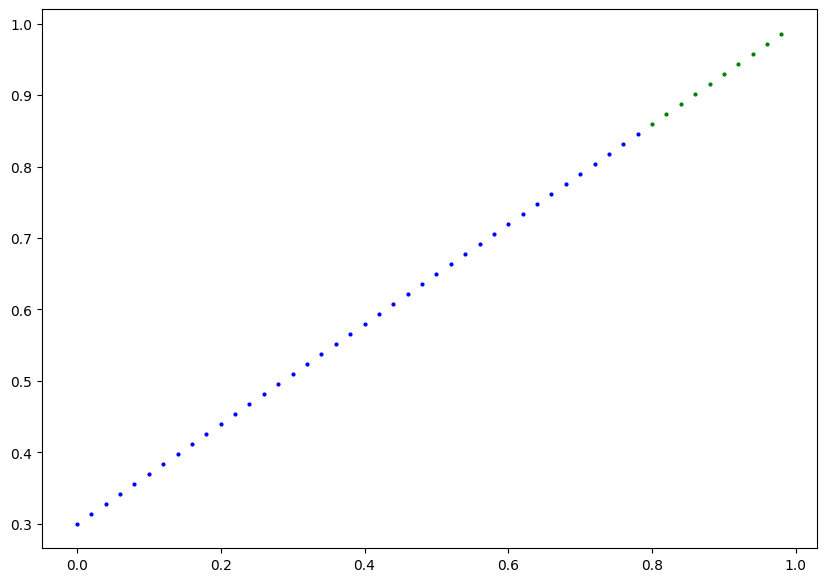

In [ ]:
plot_predictions()

###criando modelo de pytorch

#o que nosso modelo faz:
começa com valores aleatórios
passa pelos dados de entrada durante o treinamento e ajusta os valores aleatorios para que representem eses dados


In [ ]:
#criando classe de modelo de regressão linear

class LinearRegressionModel(nn.Module):     #quase tudo de pytorch vem disso
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias  =  nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    #forward method para definir o funcionamento

  def forward(self, x: torch.Tensor) -> torch.Tensor:    #x é o dado de entrada
    return self.weights * x + self.bias #formula de regressao linear

###checando o conteúdo do nosso modelo

usando .parameters

In [ ]:
#criando random seed
torch.manual_seed(42)

#criando uma instancia do modelo
model_0 = LinearRegressionModel()

#checando ios parametroos
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#listando com nomes
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#fazendo predições usando 'torch.inference_mode()'
vamos ver seu poder de predição
quando passamos dados pelo nosso modelo ele passará pela classe forward

In [ ]:
#fazendo predições
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

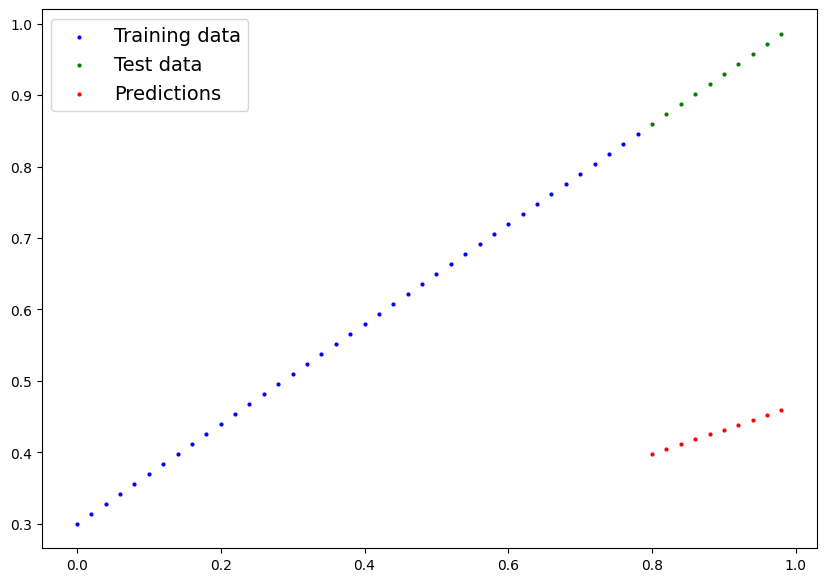

In [ ]:
plot_predictions(predictions=y_preds)

###Treinar modelo
ideia de treinar é ajustar os pesos de maneira eficiente

para isso precisamos de:

*loss function*

*optimizer*

In [ ]:
#escolhendo a loss
loss_fn = nn.L1Loss()

#escolhendo optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


###Construindo um loop de treinamento

COISAS NECESSÁRIAS:

0. Loop pelos dados
1. passar usando forward(dados passando pela função forward)
2. calcular loss
3. optimizer zero grad
4. loss backward -
5. optimizer step


In [ ]:
torch.manual_seed(42)
#uma época é um loop pelos dados
epochs = 100


epoch_count = []
loss_values = []
test_loss_values= []

##treino
#0. loop pelos dados
for epoch in range(epochs):
  #setar o modelo para modo de treino
  model_0.train() #modo treino seta todos os parametros que precisam de gradiente para requisitar esses gradientes

  #1.parte de forward
  y_pred = model_0(X_train)

  #2. Calcular a loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #fazer backpropagation na loss com respeito aos parâmetros do modelo
  loss.backward()

  #5. step no optimizer(fazer gradiente descer)
  optimizer.step()

  model_0.eval()#desliga algumas configurações para testar
  with torch.inference_mode():
    # 1. fazer forward pass
    test_pred = model_0(X_test)

    # 2. calclando a loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    #printando saída
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

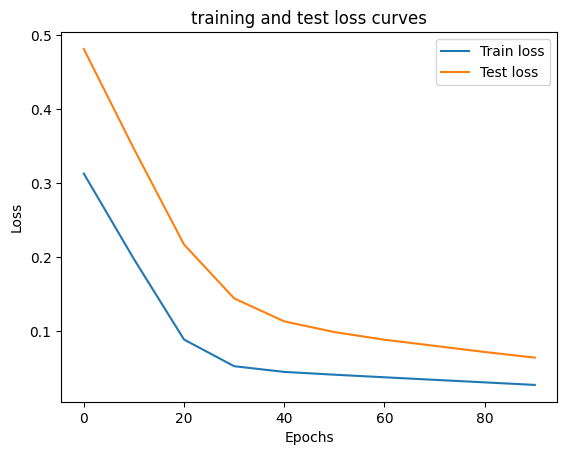

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, (torch.tensor(test_loss_values).numpy()), label="Test loss")

plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

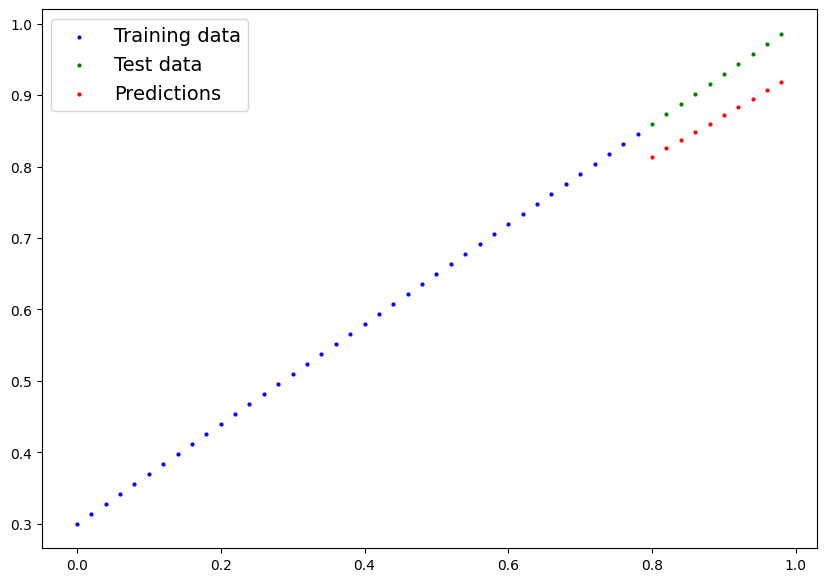

In [ ]:
plot_predictions(predictions=y_preds_new)

###salvando modelo com pytorch
#Três métodos

1. 'torch.save()' - permite salvar objeto pytorch em formato pickle de python
2. torch.load() - permite carregar um objeto pronto pytorch
3. torch.nn.Module.load_state_dict() - permite salvar o estdo do modelo completo

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#salvando o modelo
from pathlib import Path

#1. criar diretório para modelos
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. criar caminho para salvar modelo
MODEL_NAME =  "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#salvando o state_dict() do modelo
print(f"salvando modelo em: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

salvando modelo em: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Jan 16 17:31 01_pytorch_workflow_model_0.pth


###Carregando o modelo

como salvamos state_dict() do modelo carregaremos só isso

In [ ]:
#Para carregar um state_dict temos que instanciar uma nova classe para o modelo
loaded_model_0 = LinearRegressionModel()

#Carregar o state_dict() do modelo_0(vai dar update na nova instancia com paremtros atuais)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
#faremos predições para ter certeza
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

###Colocando tudo junto
Retomando os passos

In [ ]:
#imoport Pytorch e matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#cirar como padrão device_agnostic code

In [ ]:
#setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [ ]:
!nvidia-smi

Tue Jan 16 17:31:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#6.1 Data

In [ ]:
#Criar uns dados usando fórmula de regressão linear
weight = 0.7
bias = 0.3

#criar valores de range
start = 0
end = 1
step = 0.02

#criando features e labels
X =  torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#dividindo os dados
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

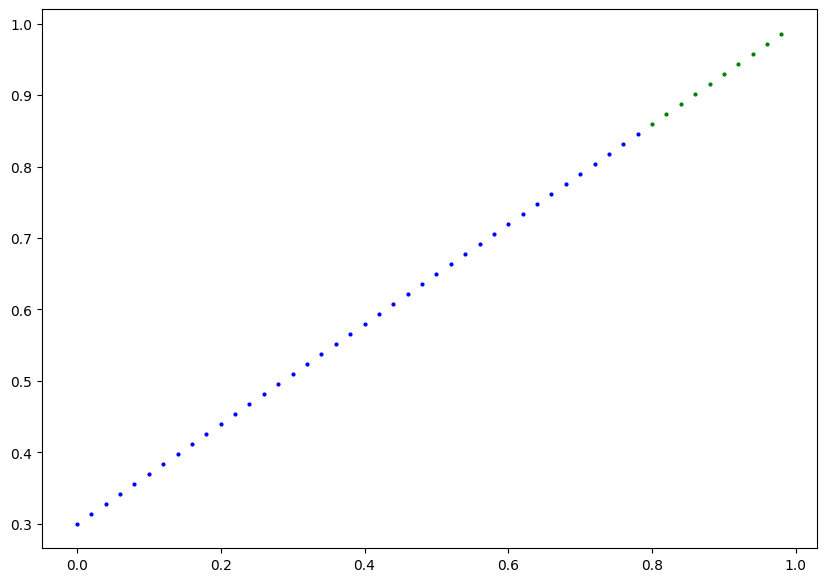

In [ ]:
#plotr os dados
#se não tiver a funçao plot_predictions salva vai dar erro
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
#recriando o mdeolo usando subclasse nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #usar nn.Linear
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

#setar a manual_seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

###Treinando o segundo modelo
pra treinar precisamosÇ
*funcao de loss
*optimizer
*loop de treino
*loop de teste

In [ ]:
#setar o modelo para usar o cuda
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
#escolhendo a loss
loss_fn = nn.L1Loss()

#setar optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
#fazendo loop de trreino
torch.manual_seed(42)

epochs = 200
#colocar dados para cuda também
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  #1. forward pass
  y_pred = model_1(X_train)

  #2. calcular loss
  loss = loss_fn(y_pred, y_train)

  #3. optimizer zerar grad
  optimizer.zero_grad()

  #4. fazer bckpropagation
  loss.backward()

  #5. optimizer step
  optimizer.step()

#### testando
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #printar o que está acontecendo

  if epoch % 10 ==0:
    print(f" Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

 Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
 Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
 Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
 Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
 Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
 Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
 Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
 Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
 Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
 Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
 Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
 Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
 Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
 Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.0

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#tornal modelo para avaliar
model_1.eval

#fazer predições
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

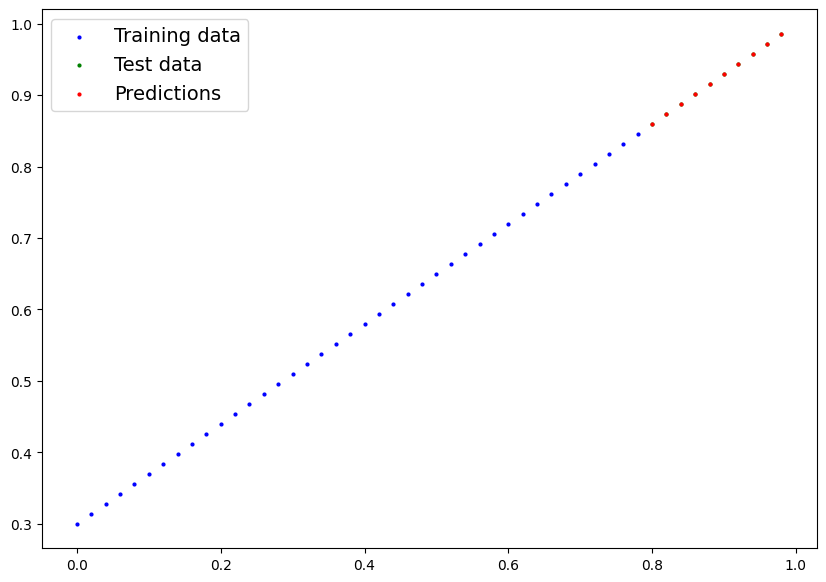

In [ ]:
#plotar predições
plot_predictions(predictions=y_preds.cpu())

###Salvando e carregando o modelo

In [ ]:
#1. criando caminho para salvar
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#printando para verificar
print(f"salvando em:{MODEL_SAVE_PATH}")
#slvando com torch.save
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

salvando em:models/01_pytorch_workflow_model_1.pth


In [ ]:
#PARA CARREGAR O MODELO usamos:
loaded_model_1 = LinearRegressionModelV2()

#carregamos o estdo do modelo
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#coloca o modelo para o device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
#faremos predições para ter certeza
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')